In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [79]:
df=pd.read_csv('G:\data analysis\GRIP @ SPARK\_task 2\SampleSuperstore.csv')  #loading the file
df.head() #printing first 5 rows


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [81]:
df['Country'].value_counts()
df['City'].value_counts()
df['State'].value_counts()
df['Region'].value_counts()
df['Category'].value_counts()
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [82]:
df1=pd.get_dummies(df, columns=["Ship Mode",'Segment','Region','Category','Sub-Category'])
df1

,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,United States,Henderson,Kentucky,42420,261.9600,2,0.00,41.9136,0,0,...,0,0,0,0,0,0,0,0,0,0
1,United States,Henderson,Kentucky,42420,731.9400,3,0.00,219.5820,0,0,...,0,0,0,0,0,0,0,0,0,0
2,United States,Los Angeles,California,90036,14.6200,2,0.00,6.8714,0,0,...,0,0,0,1,0,0,0,0,0,0
3,United States,Fort Lauderdale,Florida,33311,957.5775,5,0.45,-383.0310,0,0,...,0,0,0,0,0,0,0,0,0,1
4,United States,Fort Lauderdale,Florida,33311,22.3680,2,0.20,2.5164,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,United States,Miami,Florida,33180,25.2480,3,0.20,4.1028,0,0,...,0,0,1,0,0,0,0,0,0,0
9990,United States,Costa Mesa,California,92627,91.9600,2,0.00,15.6332,0,0,...,0,0,1,0,0,0,0,0,0,0
9991,United States,Costa Mesa,California,92627,258.5760,2,0.20,19.3932,0,0,...,0,0,0,0,0,0,1,0,0,0
9992,United States,Costa Mesa,California,92627,29.6000,4,0.00,13.3200,0,0,...,0,0,0,0,0,1,0,0,0,0


In [83]:
df1=df1.drop(columns=['Country','City','State','Postal Code'],axis=1)

#df["City"] = df["City"].cat.codes
#df["State"] = df["State"].cat.codes
#df['Sub-Category'] = df['Sub-Category'].cat.codes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales                     9994 non-null   float64
 1   Quantity                  9994 non-null   int64  
 2   Discount                  9994 non-null   float64
 3   Profit                    9994 non-null   float64
 4   Ship Mode_First Class     9994 non-null   uint8  
 5   Ship Mode_Same Day        9994 non-null   uint8  
 6   Ship Mode_Second Class    9994 non-null   uint8  
 7   Ship Mode_Standard Class  9994 non-null   uint8  
 8   Segment_Consumer          9994 non-null   uint8  
 9   Segment_Corporate         9994 non-null   uint8  
 10  Segment_Home Office       9994 non-null   uint8  
 11  Region_Central            9994 non-null   uint8  
 12  Region_East               9994 non-null   uint8  
 13  Region_South              9994 non-null   uint8  
 14  Region_W

In [88]:
df1.corr()['Profit']#.sort_values()

Sales                       0.479064
Quantity                    0.066253
Discount                   -0.219487
Profit                      1.000000
Ship Mode_First Class       0.005795
Ship Mode_Same Day          0.000624
Ship Mode_Second Class      0.001844
Ship Mode_Standard Class   -0.006040
Segment_Consumer           -0.012515
Segment_Corporate           0.005056
Segment_Home Office         0.010268
Region_Central             -0.027167
Region_East                 0.009376
Region_South                0.000377
Region_West                 0.015222
Category_Furniture         -0.044221
Category_Office Supplies   -0.043822
Category_Technology         0.101825
Sub-Category_Accessories    0.031507
Sub-Category_Appliances     0.009692
Sub-Category_Art           -0.025690
Sub-Category_Binders       -0.015953
Sub-Category_Bookcases     -0.028627
Sub-Category_Chairs         0.015811
Sub-Category_Copiers        0.278873
Sub-Category_Envelopes     -0.000854
Sub-Category_Fasteners     -0.015443
S

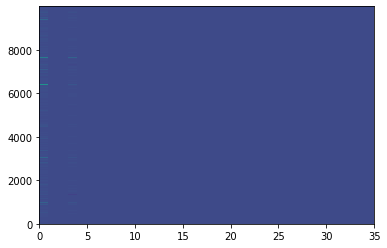

In [85]:
plt.pcolor(df1)
plt.show()